In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/lung_cancer_examples.csv'
data = pd.read_csv(file_path)

# Remove irrelevant columns
data_cleaned = data.drop(columns=['Name', 'Surname'])

# Display basic information
print(data_cleaned.info())
print(data_cleaned.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     59 non-null     int64
 1   Smokes  59 non-null     int64
 2   AreaQ   59 non-null     int64
 3   Alkhol  59 non-null     int64
 4   Result  59 non-null     int64
dtypes: int64(5)
memory usage: 2.4 KB
None
             Age     Smokes      AreaQ     Alkhol     Result
count  59.000000  59.000000  59.000000  59.000000  59.000000
mean   42.627119  15.067797   5.203390   3.237288   0.474576
std    16.235230   7.984607   2.461984   2.380517   0.503640
min    18.000000   0.000000   1.000000   0.000000   0.000000
25%    29.000000  10.000000   3.000000   1.000000   0.000000
50%    39.000000  15.000000   5.000000   3.000000   0.000000
75%    55.000000  20.000000   7.500000   5.000000   1.000000
max    77.000000  34.000000  10.000000   8.000000   1.000000


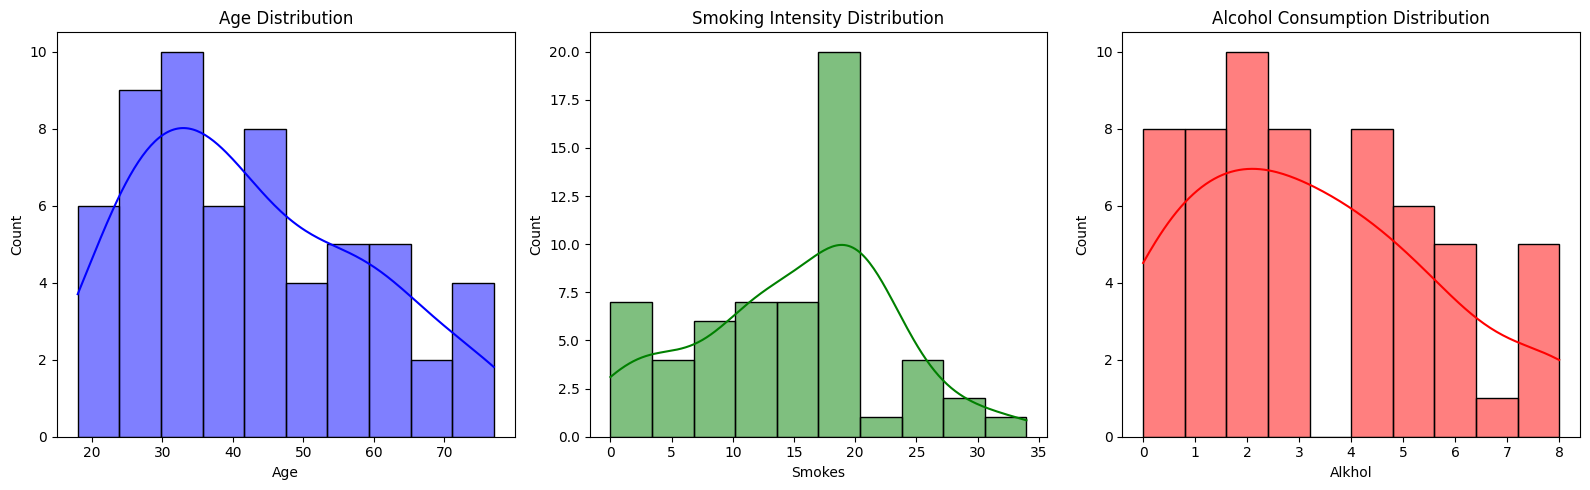

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions of Age, Smoking, and Alcohol Consumption
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.histplot(data_cleaned['Age'], kde=True, bins=10, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data_cleaned['Smokes'], kde=True, bins=10, color='green')
plt.title('Smoking Intensity Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data_cleaned['Alkhol'], kde=True, bins=10, color='red')
plt.title('Alcohol Consumption Distribution')

plt.tight_layout()
plt.show()


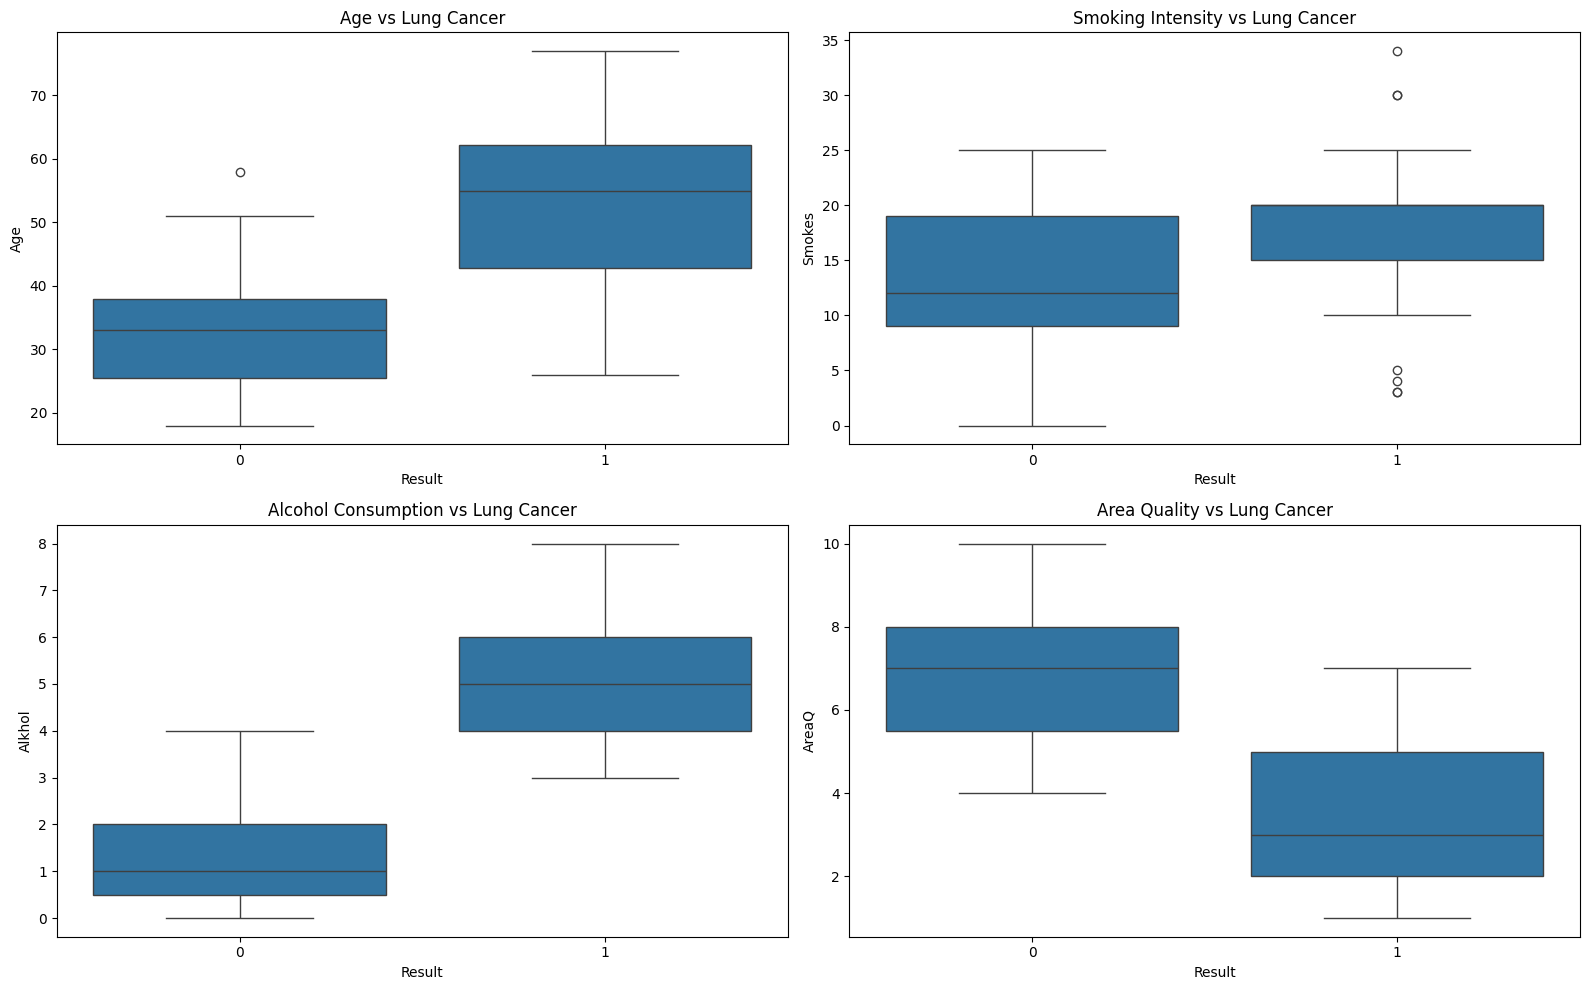

In [4]:
# Visualize relationships between features and lung cancer outcome
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Result', y='Age', data=data_cleaned)
plt.title('Age vs Lung Cancer')

plt.subplot(2, 2, 2)
sns.boxplot(x='Result', y='Smokes', data=data_cleaned)
plt.title('Smoking Intensity vs Lung Cancer')

plt.subplot(2, 2, 3)
sns.boxplot(x='Result', y='Alkhol', data=data_cleaned)
plt.title('Alcohol Consumption vs Lung Cancer')

plt.subplot(2, 2, 4)
sns.boxplot(x='Result', y='AreaQ', data=data_cleaned)
plt.title('Area Quality vs Lung Cancer')

plt.tight_layout()
plt.show()


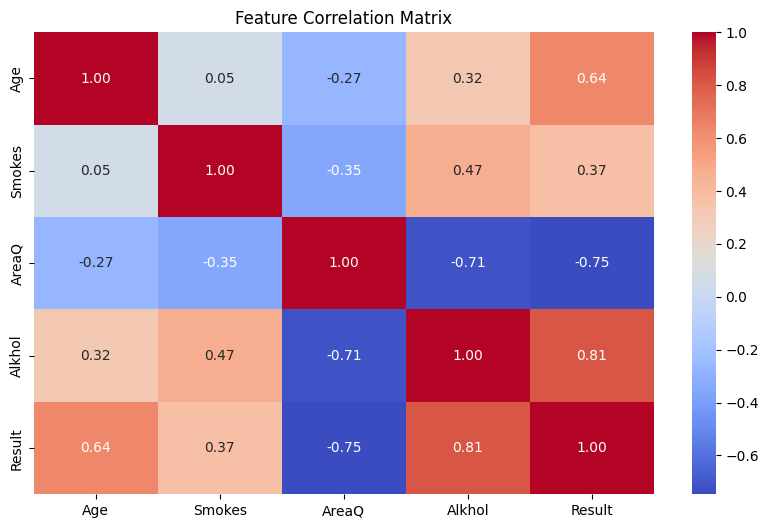

In [5]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


In [6]:
# Display correlation values
correlations = data_cleaned.corr()
print(correlations)


             Age    Smokes     AreaQ    Alkhol    Result
Age     1.000000  0.053665 -0.268957  0.318621  0.637726
Smokes  0.053665  1.000000 -0.353295  0.469915  0.373444
AreaQ  -0.268957 -0.353295  1.000000 -0.714412 -0.746621
Alkhol  0.318621  0.469915 -0.714412  1.000000  0.810439
Result  0.637726  0.373444 -0.746621  0.810439  1.000000


In [7]:
# Check for missing values
missing_values = data_cleaned.isnull().sum()
print("Missing Values:\n", missing_values)

# Detect outliers using IQR (Interquartile Range)
Q1 = data_cleaned.quantile(0.25)
Q3 = data_cleaned.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data_cleaned < (Q1 - 1.5 * IQR)) | (data_cleaned > (Q3 + 1.5 * IQR)))
print("Outliers Detected:\n", outliers.sum())


Missing Values:
 Age       0
Smokes    0
AreaQ     0
Alkhol    0
Result    0
dtype: int64
Outliers Detected:
 Age       0
Smokes    0
AreaQ     0
Alkhol    0
Result    0
dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Prepare data for modeling
X = data_cleaned.drop(columns=['Result'])
y = data_cleaned['Result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
importance = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
print("Feature Importance:\n", feature_importance.sort_values(by='Importance', ascending=False))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12

Confusion Matrix:
 [[8 0]
 [1 3]]
Feature Importance:
   Feature  Importance
3  Alkhol    0.818980
1  Smokes    0.242463
0     Age    0.240561
2   AreaQ   -1.024740


In [9]:
from scipy.stats import ttest_ind

# T-test between cancer and non-cancer groups for Age
group_0 = data_cleaned[data_cleaned['Result'] == 0]['Age']
group_1 = data_cleaned[data_cleaned['Result'] == 1]['Age']

t_stat, p_value = ttest_ind(group_0, group_1)
print(f"T-test for Age: t-statistic = {t_stat}, p-value = {p_value}")

# Repeat similar tests for other features like 'Smokes' and 'Alkhol'


T-test for Age: t-statistic = -6.250747650557592, p-value = 5.568574822803532e-08


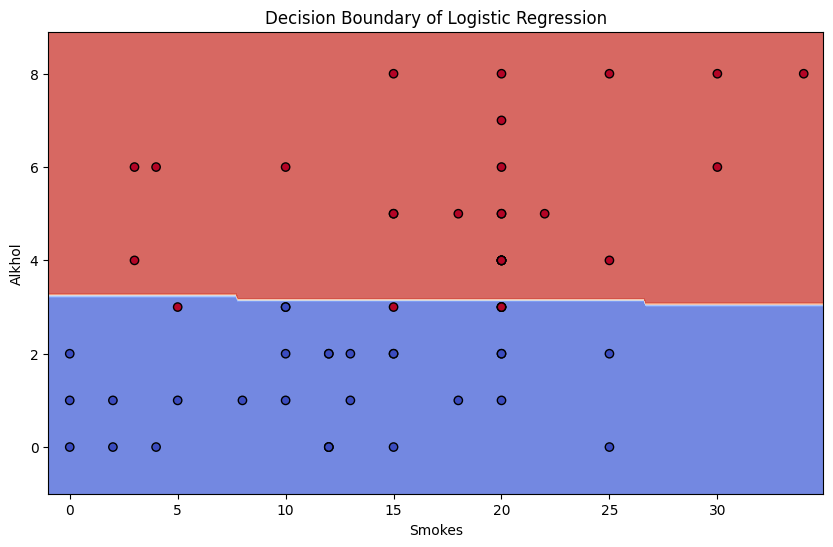

In [10]:
import numpy as np

# Select two features for visualization
X_vis = data_cleaned[['Smokes', 'Alkhol']].values
y_vis = data_cleaned['Result'].values

# Train logistic regression on these features
model_vis = LogisticRegression()
model_vis.fit(X_vis, y_vis)

# Plot decision boundary
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k', cmap='coolwarm')
plt.title('Decision Boundary of Logistic Regression')
plt.xlabel('Smokes')
plt.ylabel('Alkhol')
plt.show()
